# Import required libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the Iris dataset

In [2]:
df = pd.read_csv('/kaggle/input/iris-dataset/1) iris.csv')

# Step 1: Inspect dataset

In [3]:
print("Dataset Head:\n", df.head())
print("\nMissing Values Before:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nDataset Shape:\n", df.shape)

Dataset Head:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Missing Values Before:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data Types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Dataset Shape:
 (150, 5)


# Step 2: Preprocess data

In [4]:
# Encode the categorical target (species) to numerical values
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [5]:
# Define features and target
# Using sepal_length, sepal_width, petal_length, petal_width as features
X = df.drop('species', axis=1)
y = df['species']

In [6]:
# Standardize features for better KNN performance
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [7]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Print shapes to verify the split
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (120, 4) (120,)
Testing set shape: (30, 4) (30,)


# Step 3: Train KNN classifier with k=5

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
# Predict on test set
y_pred = knn.predict(X_test)

# Step 4: Evaluate model performance

In [11]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Step 5: Test different k values to find optimal k

In [12]:
k_values = range(1, 16)
accuracies = []
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, knn_temp.predict(X_test)))

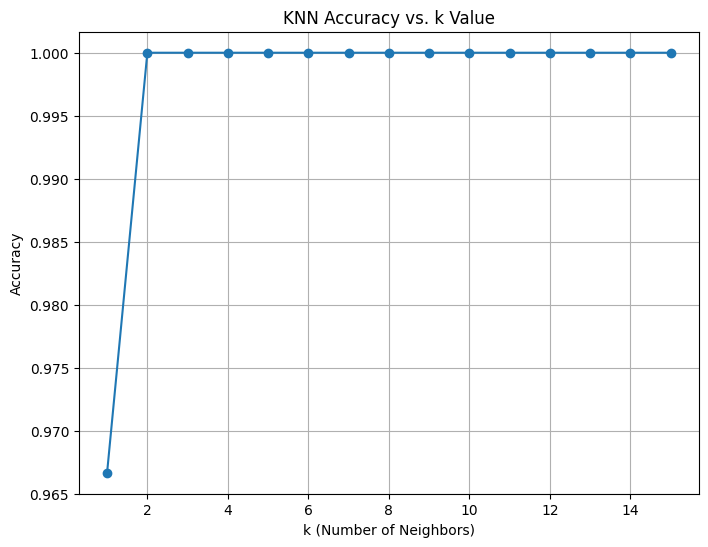

In [13]:
# Plot accuracy vs k
# Visualizing how accuracy changes with different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. k Value')
plt.grid(True)
plt.savefig('/kaggle/working/knn_accuracy_vs_k.png')
plt.show()

# Step 6: Visualize confusion matrix

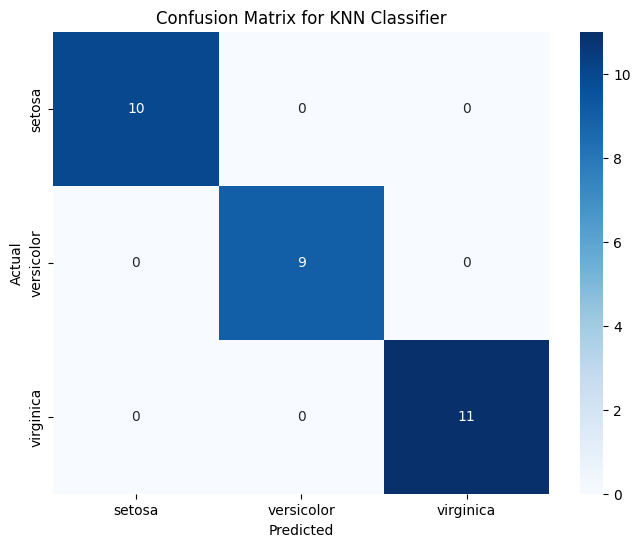

In [14]:
# heatmap to show classification performance
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.savefig('/kaggle/working/confusion_matrix.png')
plt.show()

# Step 7: Save model and predictions

In [15]:
with open('/kaggle/working/knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)
pd.DataFrame({'Actual': label_encoder.inverse_transform(y_test), 'Predicted': label_encoder.inverse_transform(y_pred)}).to_csv('/kaggle/working/predictions_knn.csv', index=False)

print("\nSaved: knn_model.pkl, predictions_knn.csv, knn_accuracy_vs_k.png, confusion_matrix.png")


Saved: knn_model.pkl, predictions_knn.csv, knn_accuracy_vs_k.png, confusion_matrix.png
